Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.
- Works best when data is 'tidy'

Cons?

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

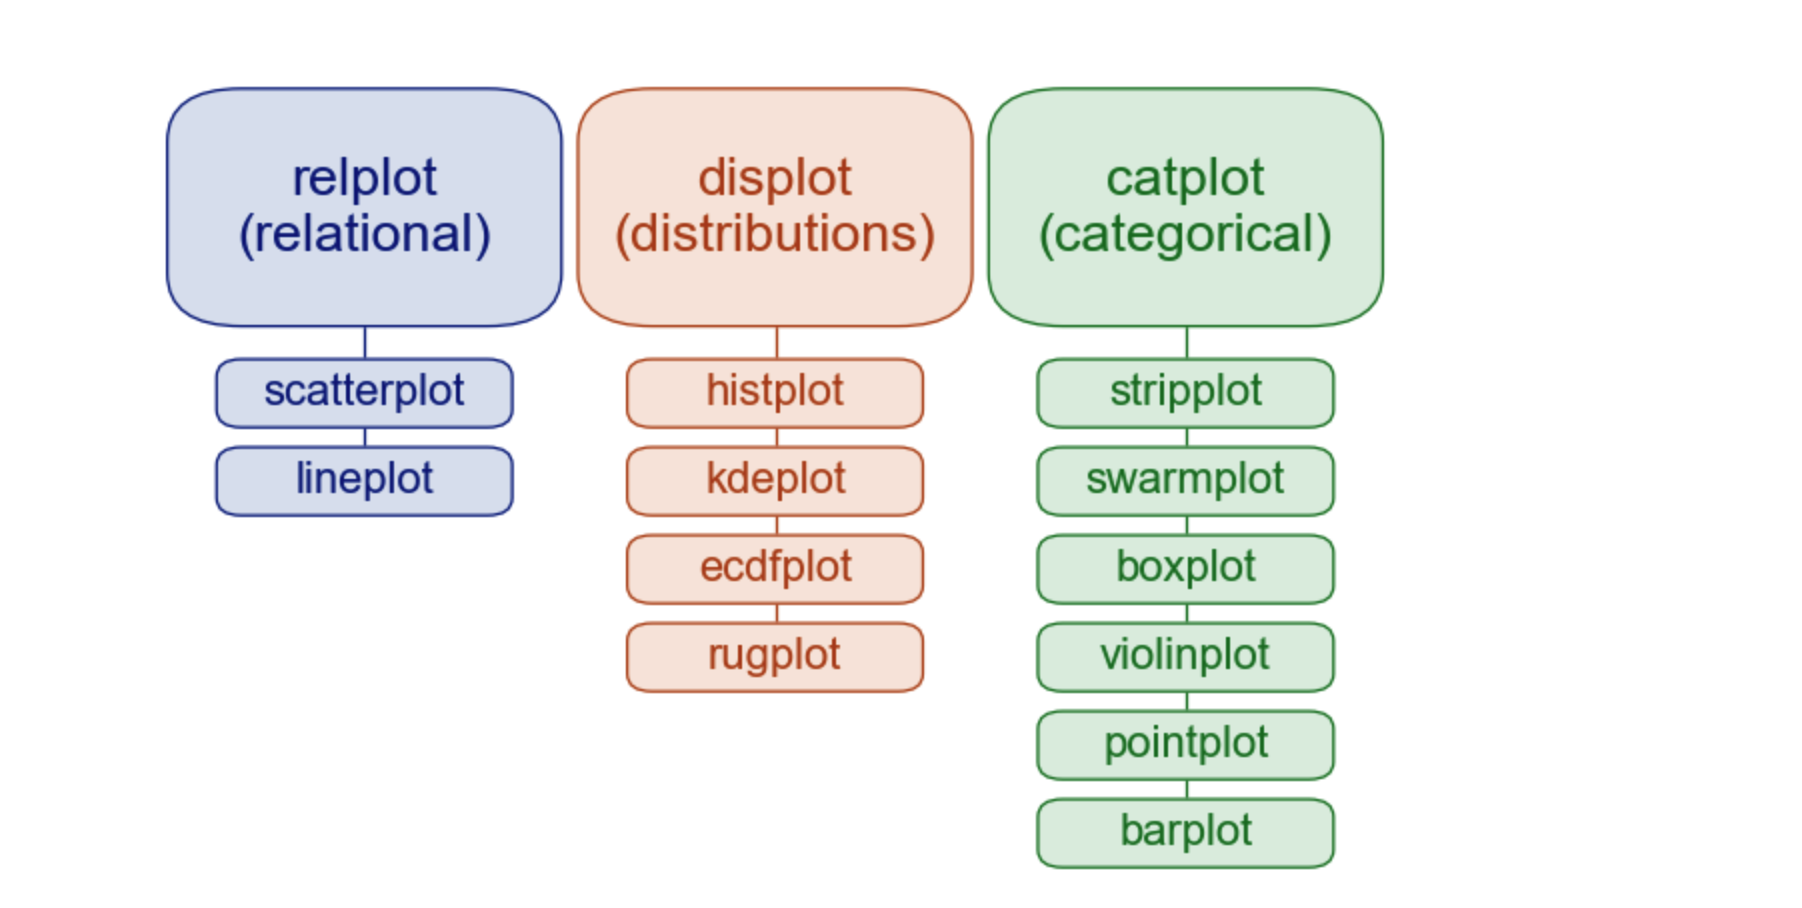

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [4]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [5]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [6]:
# Option 2: Load using pydataset
tips = data('tips')

In [7]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [8]:
# check the head
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# check for nulls and datatypes
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

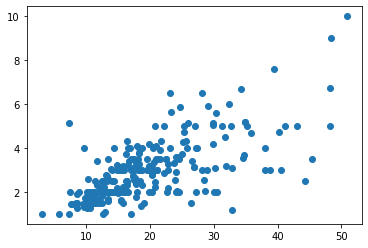

In [12]:
# scatterplot in matplotlib

plt.scatter(tips.total_bill, tips.tip)

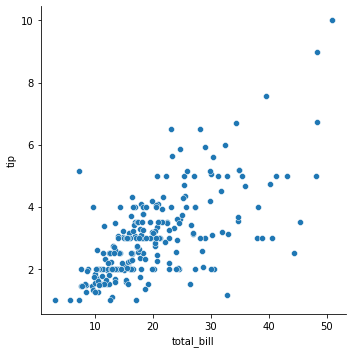

In [109]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

In [ ]:
# Update defaults (rc params in matplotlib)

sns.set_theme()  # https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [ ]:
# same plot above, but with different sns defaults ()



### hue, size and style arguments

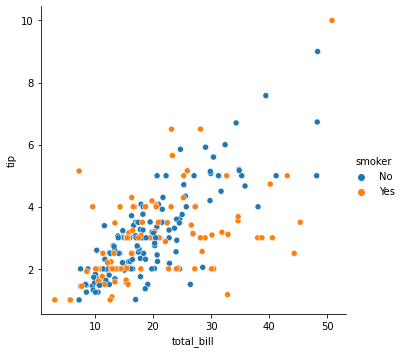

In [19]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker')

## Relplot with 'kind' argument

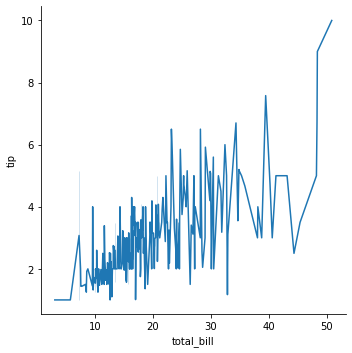

In [20]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument
# kind = 'line'


sns.relplot(data = tips, x = 'total_bill', y = 'tip',  kind = 'line')

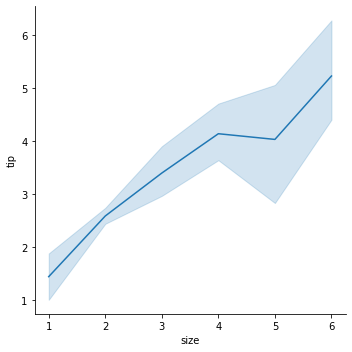

In [22]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip', kind= 'line')

# shaded line is the confidence level of the lines
# which describes the accuracy of the data

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

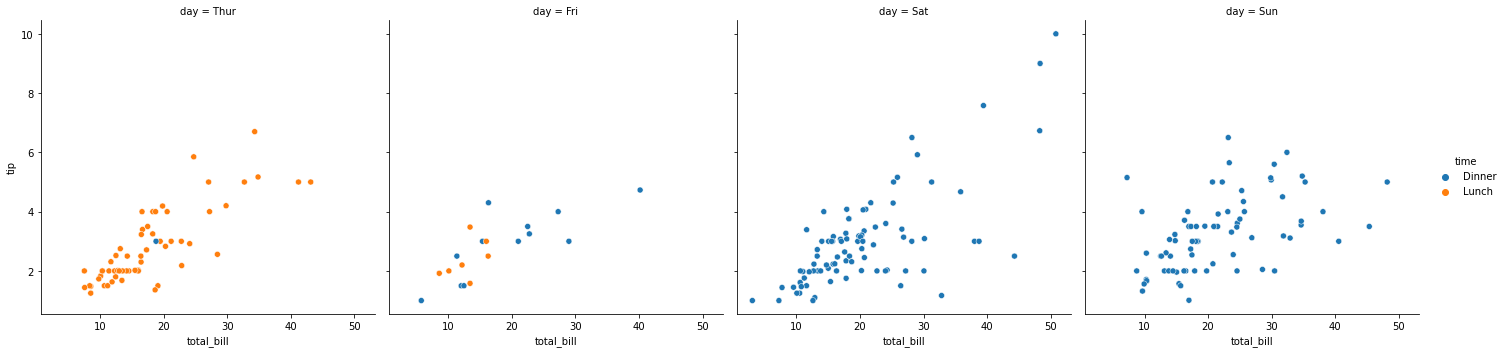

In [25]:
#  FacetGrid with 'col'

sns.relplot(data = tips,
            x = 'total_bill',
            y = 'tip',
            col = 'day',
            hue = 'time',
           col_order = ['Thur', 'Fri','Sat','Sun'])

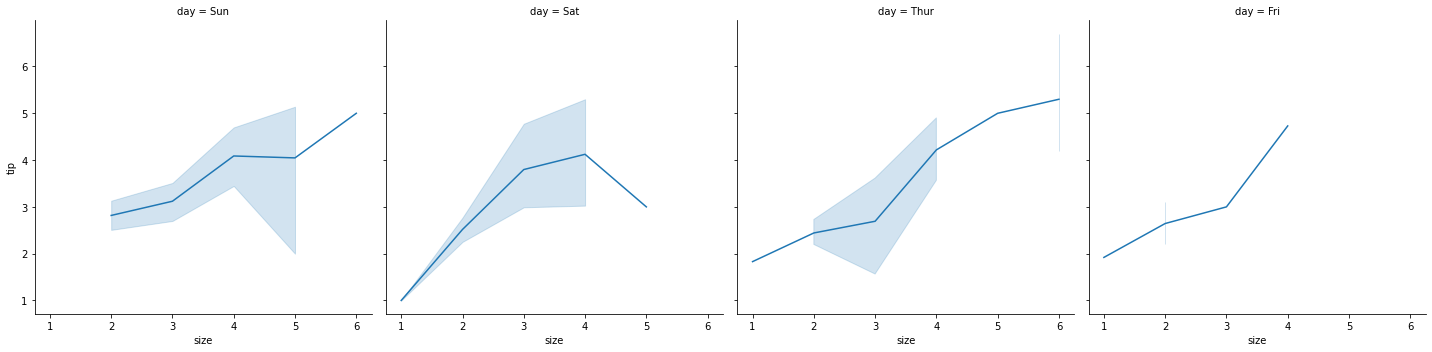

In [26]:
# Facetgrid with lineplot

sns.relplot(data = tips,
            x = 'size',
            y = 'tip',
            kind = 'line',
            col = 'day')

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

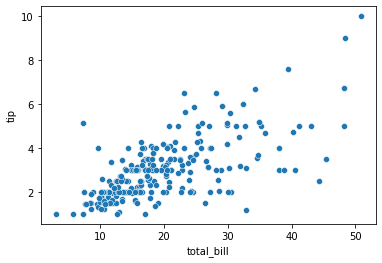

In [28]:
# scatterplot - returns an axes level object

sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')

## Distributions: displot

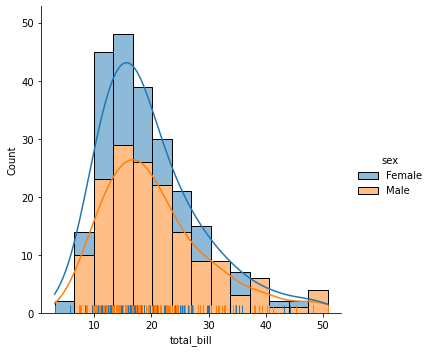

In [32]:
# displot for total_bill (hist, kde, rug)

# rug = amount of observations
# kde = kernel density estimation. Smooth version of histogram

sns.displot(data = tips,
            x = 'total_bill',
            kde= True,
            rug=True, 
            hue = 'sex', 
            multiple = 'stack')

In [ ]:
# histogram with hue and stacking and palette


# sns.displot(data = tips, x = 'total_bill')

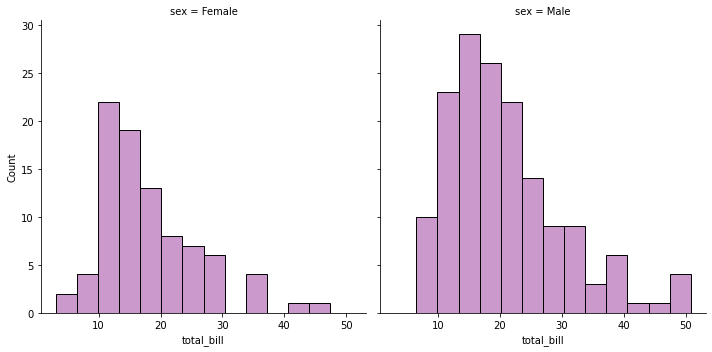

In [36]:
# use 'col' argument with 'sex' to create 'small multiples'

# alpha = transparency

sns.displot(data = tips, 
            x = 'total_bill', 
            col = 'sex', 
            color = 'purple',
            alpha = 0.4)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

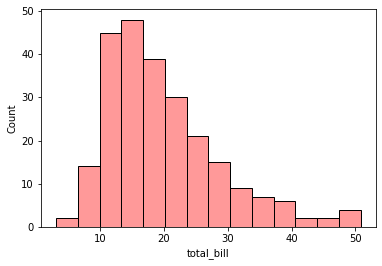

In [40]:
#histplot will return an axes level object

sns.histplot(data = tips, 
             x = 'total_bill', 
             color = 'red', 
             alpha = 0.4)

### Categorial Plots

#### Catplots

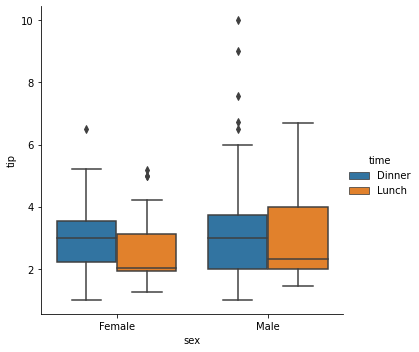

In [43]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, x= 'sex', y = 'tip', kind = 'box', hue = 'time')

In [44]:
# descriptive statistics for tip

tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip'>

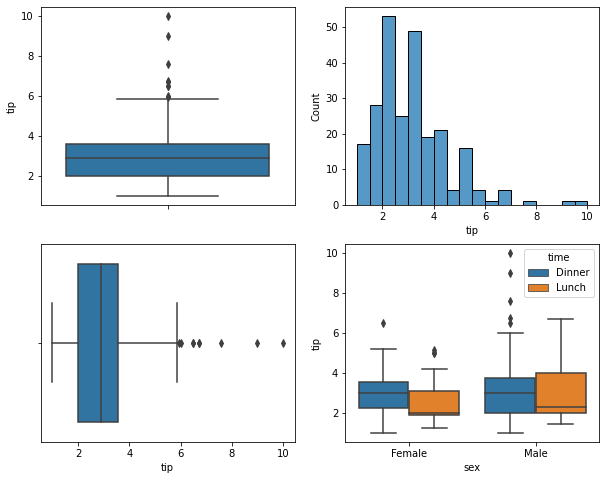

In [70]:
#  Create a figure with 4 subplots (Make sure to use axes-level seaborn functions)

# Create a figure with 4 boxplots
plt.figure(figsize = (10,8))

# first subplot
plt.subplot(221)
sns.boxplot(data = tips, y='tip')


# Second subplot
plt.subplot(222)
sns.histplot(data = tips,x ='tip')

#third subplot
plt.subplot(223)
sns.boxplot(data = tips, x = 'tip')

# 4th subplot
plt.subplot(224)
sns.boxplot(data = tips, y = 'tip', x='sex', hue = 'time')


<AxesSubplot:xlabel='sex', ylabel='tip'>

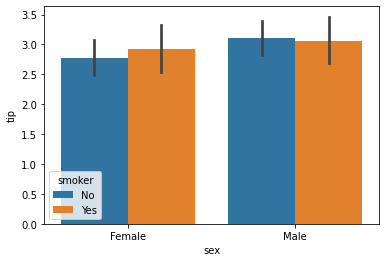

In [74]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'smoker', estimator = np.mean)

#### Pairplot

In [75]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

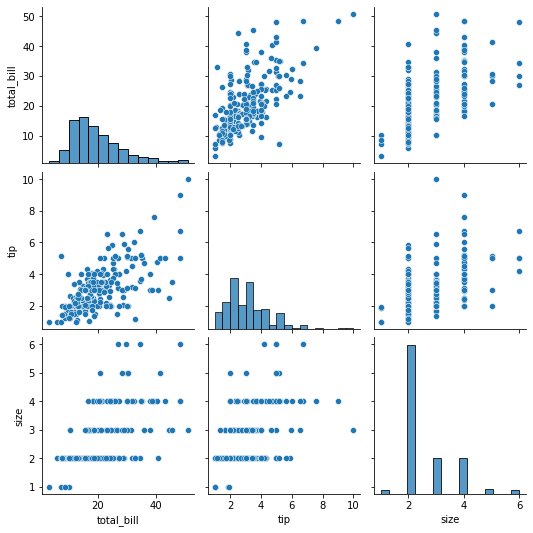

In [76]:
# pairplot for whole dataframe

sns.pairplot(tips)

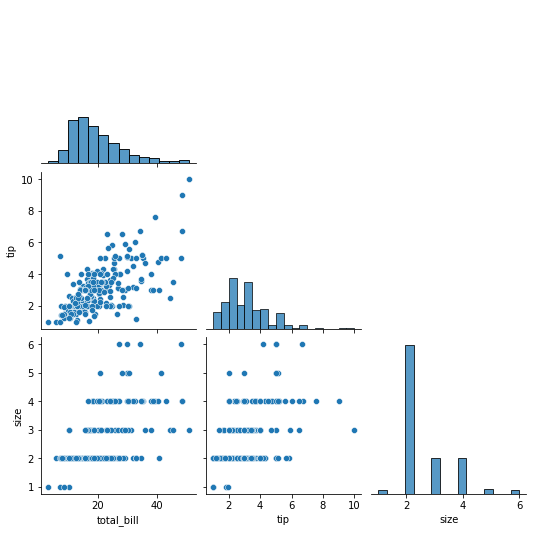

In [77]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

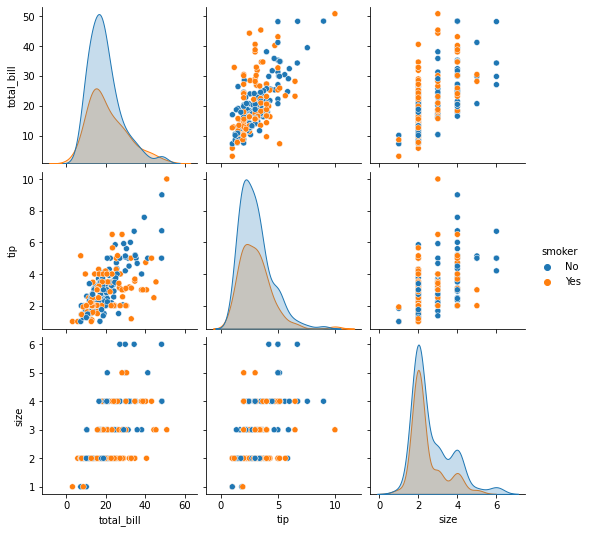

In [78]:
# use hue argument to visualize relationship based of different categories
# pairplot uses only numeric values for plot 
# indicated in the dtypes
sns.pairplot(tips, hue= 'smoker')

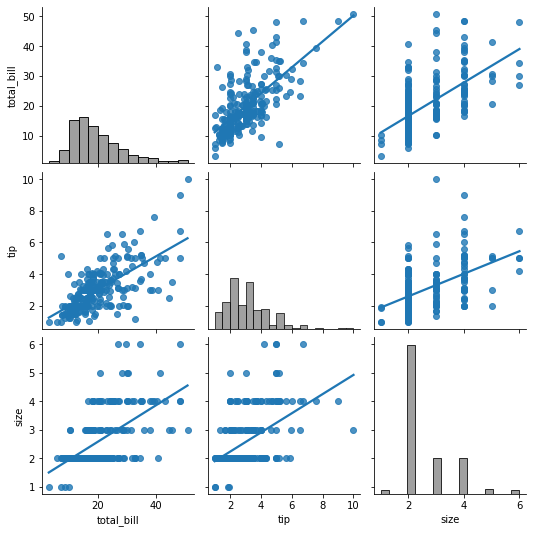

In [80]:
# use different plot type. 'reg' plot instead of 'scatter'

sns.pairplot(tips, diag_kind= 'hist',
             diag_kws= {'color': 'gray'},
             kind = 'reg',
             plot_kws={'ci': None})

#### Heatmap

In [81]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

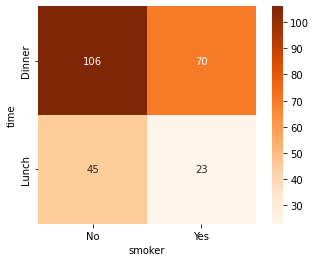

In [89]:
# create a heatmap
# cmap = color schema
# annot = annotating range in boxes
# Square gives it shape
# fmt = 0.0f makes it a 'float'

sns.heatmap(ctab, 
            cmap = 'Oranges', 
            annot = True, 
            square = True, 
            fmt = '0.0f')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

In [90]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [91]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [96]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

<AxesSubplot:>

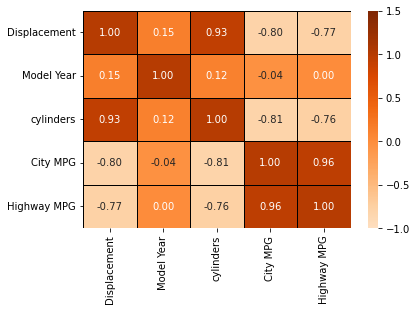

In [107]:
# heatmap for correlation table above
# checks correlations between two variables

sns.heatmap(mpg.corr(), 
            cmap = 'Oranges', 
            annot = True, 
            fmt = '0.2f', 
            center = 0,
            vmin = -1, 
            vmax = 1.5,
            linewidth = 1,
            linecolor = 'k',
            xticklabels = labels,
            yticklabels = labels)